# Setup/Imports

In [72]:
from src.drops import Drops

drop_model = Drops(
    file_path="../data/2023-05-20_nationals_c.yaml",
    method="std_deviation",
    alpha=2.5
)

The code for the [`Drops`](../src/drops.py) class subclasses [`Results`](../utils/results.py) and is shown below:
```python
class Results:
    ...
    @property
    def teams(self) -> list[int]:
        ...
    @property
    def teams_data(self) -> list[dict[str, str | int]]:
        ...
    @property
    def events(self) -> list[str]:
        ...
    @property
    def trial_events(self) -> list[str]:
        ...
    @property
    def score_sum(self) -> dict[int, int]:
        ...
    @property
    def full_scores(self) -> dict[int, list[int]]:
        ...
    @property
    def averages(self) -> dict[int, float]:
        ...

```
```python
class Drops(Results):
    ...
    def iqr(self, alpha: float = ...) -> None:
        """Calculates the IQR method for determining "bombed" events"""
        ...
    def mean(self, alpha: float = ...) -> None:
        """Calculates the mean method for determining "bombed" events"""
        ...
    def std_deviation(self, alpha: float = ...) -> None:
        """Calculates the standard deviation method for determining "bombed" events"""
        ...
    def drop(self) -> None:
        """Drops the "bombed" events from the scores"""
        ...
    def visualize(self) -> None:
        """Visualizes the data"""
        ...
    
```

## Event Scoring

## Average Score Per School

In [73]:
import utils

print("Average score per school: ", utils.pretty_print(drop_model.teams, dict(sorted(drop_model.averages.items(), key=lambda item: item[1]))))


Average score per school:  {'Adlai E. Stevenson High School ': 9.043478260869565, 'Solon High School ': 9.91304347826087, 'Mason High School ': 10.130434782608695, 'Troy High School ': 12.130434782608695, 'Harriton High School ': 12.73913043478261, 'Acton-Boxborough Regional High School ': 12.956521739130435, 'Castro Valley High School ': 13.956521739130435, 'Seven Lakes High School ': 14.173913043478262, 'New Trier High School ': 14.478260869565217, 'William G. Enloe High School ': 15.956521739130435, 'Marquette University High School ': 16.08695652173913, 'Syosset High School ': 16.565217391304348, 'Grand Haven High School ': 17.608695652173914, 'Lower Merion High School ': 18.130434782608695, 'West Windsor-Plainsboro High School North ': 18.391304347826086, 'William P. Clements High School ': 20.08695652173913, 'North Carolina School of Science and Mathematics ': 20.434782608695652, 'Carmel High School ': 20.434782608695652, 'Ward Melville High School ': 20.73913043478261, 'F.W. Buc

# Distinguishing "Bombed" Events
### Using the following methods to determine "bombed" events:
##### These values become the upper fence for the data
- $\alpha \times \overline{X} $
- $\alpha \times (Q_3 - Q_1) + Q_3$ &nbsp; (IQR)
- $\alpha \times \sigma + \overline{X} $&nbsp;&nbsp;&nbsp; (Standard Deviation)

where $\alpha$ is a multiplicative constant


### Mean Method (alpha = 2)

In [74]:
# redefine our model to use this method
mean_model = Drops(
    file_path="../data/2023-05-20_nationals_c.yaml",
    method="mean",
    alpha=2
)
mean_model.drop()

"Bombed" events by school: {'Syosset High School ': ['Bridge', 'Flight', 'Remote Sensing'], 'Ward Melville High School ': [], 'Troy High School ': ['Chemistry Lab', 'Forensics', 'WiFi Lab'], 'Castro Valley High School ': ['Scrambler', 'Write It Do It'], 'William G. Enloe High School ': ['Astronomy', 'Scrambler'], 'North Carolina School of Science and Mathematics ': ['Environmental Chemistry', 'Forensics'], 'Grand Haven High School ': ['Cell Biology', 'Chemistry Lab', 'Detector Building'], 'Pioneer High School ': ['Write It Do It'], 'Harriton High School ': ['Dynamic Planet', 'Fermi Questions'], 'Lower Merion High School ': ['Remote Sensing'], 'Adlai E. Stevenson High School ': ['Experimental Design', 'Trajectory'], 'New Trier High School ': ['Experimental Design', 'Scrambler', 'Trajectory'], 'F.W. Buchholz High School ': ['Experimental Design', 'Write It Do It'], 'Boca Raton Community High School ': [], 'Solon High School ': ['Experimental Design', 'Remote Sensing'], 'Mason High School

{11: 184,
 15: 192,
 16: 193,
 27: 248,
 3: 252,
 9: 262,
 4: 270,
 17: 281,
 12: 283,
 1: 328,
 5: 330,
 22: 337,
 7: 360,
 10: 376,
 24: 383,
 18: 414,
 6: 416,
 26: 419,
 2: 438,
 13: 449,
 39: 454,
 8: 487,
 23: 490,
 25: 490,
 20: 514,
 21: 518,
 42: 536,
 29: 543,
 14: 560,
 45: 569,
 19: 617,
 28: 636,
 31: 702,
 60: 715,
 59: 728,
 32: 753,
 43: 755,
 30: 781,
 37: 838,
 56: 848,
 58: 867,
 52: 873,
 41: 899,
 34: 930,
 35: 948,
 51: 949,
 49: 951,
 44: 985,
 36: 995,
 40: 1000,
 46: 1001,
 50: 1003,
 47: 1004,
 55: 1037,
 38: 1040,
 48: 1069,
 33: 1078,
 57: 1137,
 54: 1147,
 53: 1152}

### IQR Method (alpha = 1.5, standard outlier formula)

In [75]:
# redefine our model to use this method
iqr_model = Drops(
    file_path="../data/2023-05-20_nationals_c.yaml",
    method="iqr",
    alpha=1.5
)
iqr_model.drop()

"Bombed" events by school: {'Syosset High School ': ['Flight'], 'Ward Melville High School ': [], 'Troy High School ': [], 'Castro Valley High School ': ['Scrambler'], 'William G. Enloe High School ': [], 'North Carolina School of Science and Mathematics ': [], 'Grand Haven High School ': [], 'Pioneer High School ': [], 'Harriton High School ': ['Fermi Questions'], 'Lower Merion High School ': ['Remote Sensing'], 'Adlai E. Stevenson High School ': ['Experimental Design', 'Trajectory'], 'New Trier High School ': ['Scrambler'], 'F.W. Buchholz High School ': ['Experimental Design', 'Write It Do It'], 'Boca Raton Community High School ': [], 'Solon High School ': ['Experimental Design', 'Remote Sensing'], 'Mason High School ': ['Trajectory'], 'Seven Lakes High School ': [], 'William P. Clements High School ': [], 'Fulton Science Academy ': [], 'Brookwood High School ': ['Fermi Questions'], 'Thomas Jefferson High School for Science and Technology ': ['Write It Do It'], 'Marquette University

{11: 208,
 15: 228,
 16: 233,
 3: 279,
 9: 293,
 27: 298,
 4: 321,
 17: 326,
 12: 333,
 5: 367,
 22: 370,
 1: 381,
 7: 405,
 10: 417,
 24: 423,
 18: 462,
 6: 470,
 26: 470,
 2: 477,
 13: 500,
 39: 504,
 23: 535,
 25: 538,
 8: 543,
 20: 562,
 21: 577,
 29: 585,
 42: 585,
 14: 608,
 45: 619,
 19: 673,
 28: 688,
 31: 757,
 60: 772,
 59: 784,
 32: 806,
 43: 811,
 30: 838,
 37: 897,
 56: 908,
 58: 921,
 52: 930,
 41: 958,
 34: 990,
 35: 1008,
 51: 1009,
 49: 1010,
 44: 1045,
 36: 1055,
 40: 1060,
 46: 1060,
 47: 1062,
 50: 1062,
 55: 1097,
 38: 1100,
 48: 1129,
 33: 1137,
 57: 1197,
 54: 1207,
 53: 1212}

### Standard Deviation Method (alpha = 1.5)

In [76]:
# redefine our model to use this method
std_dev_model = Drops(
    file_path="../data/2023-05-20_nationals_c.yaml",
    method="std_deviation",
    alpha=1.5
)
std_dev_model.drop()

"Bombed" events by school: {'Syosset High School ': ['Bridge', 'Flight', 'Remote Sensing'], 'Ward Melville High School ': ['Environmental Chemistry'], 'Troy High School ': ['Chemistry Lab', 'Forensics', 'WiFi Lab', 'Write It Do It'], 'Castro Valley High School ': ['Scrambler'], 'William G. Enloe High School ': ['Astronomy', 'Scrambler'], 'North Carolina School of Science and Mathematics ': ['Environmental Chemistry', 'Forensics'], 'Grand Haven High School ': ['Chemistry Lab', 'Detector Building'], 'Pioneer High School ': ['Anatomy and Physiology', 'Write It Do It'], 'Harriton High School ': ['Detector Building', 'Dynamic Planet', 'Fermi Questions'], 'Lower Merion High School ': ['Remote Sensing'], 'Adlai E. Stevenson High School ': ['Experimental Design', 'Trajectory'], 'New Trier High School ': ['Experimental Design', 'Scrambler'], 'F.W. Buchholz High School ': ['Experimental Design', 'Write It Do It'], 'Boca Raton Community High School ': ['Environmental Chemistry'], 'Solon High Scho

{11: 184,
 15: 192,
 16: 193,
 27: 248,
 3: 252,
 9: 262,
 4: 270,
 17: 281,
 12: 283,
 1: 328,
 5: 330,
 22: 337,
 7: 360,
 10: 376,
 24: 383,
 18: 414,
 6: 416,
 26: 419,
 2: 438,
 13: 449,
 39: 454,
 8: 487,
 23: 490,
 25: 490,
 20: 514,
 21: 518,
 42: 536,
 29: 543,
 14: 560,
 45: 569,
 19: 617,
 28: 636,
 31: 702,
 60: 715,
 59: 728,
 32: 753,
 43: 755,
 30: 781,
 37: 838,
 56: 848,
 58: 867,
 52: 873,
 41: 899,
 34: 930,
 35: 948,
 51: 949,
 49: 951,
 44: 985,
 36: 995,
 40: 1000,
 46: 1001,
 50: 1003,
 47: 1004,
 55: 1037,
 38: 1040,
 48: 1069,
 33: 1078,
 57: 1137,
 54: 1147,
 53: 1152}

## Consistent Flaws
All of these methods are too sensitive to "top" teams while do not account nearly as well for lower ranked teams. A possible solution would be a scalar multiplier based on the team's rank. This would have a greater account for bombs even when the mean/median place on a team is lower. 

# Recalculating scores/ranking with auto drop "bombed" events

Using the standard deviation method with $\alpha = 1.5$ to determine "bombed" events as a demonstration


In [77]:
std_dev_model = Drops(
    file_path="../data/2023-05-20_nationals_c.yaml",
    method="std_deviation",
    alpha=1.5
)

std_dev_model.drop()
utils.pretty_print(std_dev_model.teams, dict(sorted(std_dev_model.dropped_scores.items(), key=lambda item: item[1])))


"Bombed" events by school: {'Syosset High School ': ['Bridge', 'Flight', 'Remote Sensing'], 'Ward Melville High School ': ['Environmental Chemistry'], 'Troy High School ': ['Chemistry Lab', 'Forensics', 'WiFi Lab', 'Write It Do It'], 'Castro Valley High School ': ['Scrambler'], 'William G. Enloe High School ': ['Astronomy', 'Scrambler'], 'North Carolina School of Science and Mathematics ': ['Environmental Chemistry', 'Forensics'], 'Grand Haven High School ': ['Chemistry Lab', 'Detector Building'], 'Pioneer High School ': ['Anatomy and Physiology', 'Write It Do It'], 'Harriton High School ': ['Detector Building', 'Dynamic Planet', 'Fermi Questions'], 'Lower Merion High School ': ['Remote Sensing'], 'Adlai E. Stevenson High School ': ['Experimental Design', 'Trajectory'], 'New Trier High School ': ['Experimental Design', 'Scrambler'], 'F.W. Buchholz High School ': ['Experimental Design', 'Write It Do It'], 'Boca Raton Community High School ': ['Environmental Chemistry'], 'Solon High Scho

{'Adlai E. Stevenson High School ': 184,
 'Solon High School ': 192,
 'Mason High School ': 193,
 'Acton-Boxborough Regional High School ': 248,
 'Troy High School ': 252,
 'Harriton High School ': 262,
 'Castro Valley High School ': 270,
 'Seven Lakes High School ': 281,
 'New Trier High School ': 283,
 'Syosset High School ': 328,
 'William G. Enloe High School ': 330,
 'Marquette University High School ': 337,
 'Grand Haven High School ': 360,
 'Lower Merion High School ': 376,
 'West Windsor-Plainsboro High School North ': 383,
 'William P. Clements High School ': 414,
 'North Carolina School of Science and Mathematics ': 416,
 'Carmel High School ': 419,
 'Ward Melville High School ': 438,
 'F.W. Buchholz High School ': 449,
 'duPont Manual High School ': 454,
 'Pioneer High School ': 487,
 'Ladue Horton Watkins High School ': 490,
 'Centennial High School ': 490,
 'Brookwood High School ': 514,
 'Thomas Jefferson High School for Science and Technology ': 518,
 'Iolani School ': 5

# Visualization of Data
We can see overall placement changes between teams as well as an overall trend as to how dropping affects the shape of the relationship/curve between teams and their scores.

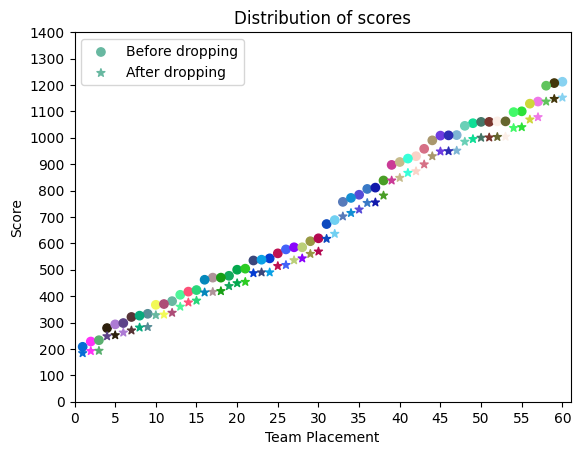

In [78]:
std_dev_model.visualize()